First, load the data,in this notebook we are using the Moss data:



In [1]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import RunML_continue
import FS
import metric

2025-01-16 11:41:21.225486: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-16 11:41:21.227908: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 11:41:21.231401: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 11:41:21.241001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737045681.257566 2002107 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737045681.26

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle
import matplotlib.pyplot as plt

### 1. Load the data and data preprocess
After reading the data, convert the abundance matrix into relative abundance matrix; 

In [3]:
df=pd.read_csv('../data/relative_abundance_df.csv',index_col = 0)
df

,Beijerinckiaceae,Mycobacteriaceae,Ktedonobacteraceae,Bryum argenteum var. argenteum,Burkholderiaceae,Micromonosporaceae,Opitutaceae,WD2101 soil group,Xanthobacteraceae,Chitinophagaceae,...,Marinifilaceae,Aerococcaceae,Acetobacterales Incertae Sedis,Bacteroidaceae,Hydrogenophilaceae,Arachis hypogaea var. vulgaris,Demequinaceae,Pseudohongiellaceae,Bacteroidetes vadinHA17,Thermoanaerobacteraceae
Sp1,57.894737,31.578947,10.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp2,1.448965,0.631692,0.039258,10.413990,6.381156,4.043540,4.025696,3.540328,3.404711,3.222698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp4,1.247068,0.856460,0.017705,0.000000,4.564467,1.226043,1.406409,3.713540,6.305050,6.754304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp5,0.524455,1.700505,0.190711,0.131114,8.470738,2.789145,3.198379,5.602130,3.929437,3.579801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp6,5.468805,80.751917,0.000000,0.000000,5.992825,0.000000,0.014068,0.000000,0.274319,0.235633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp7,2.525957,1.713743,0.005582,0.018142,4.873283,0.117227,1.646757,6.127889,2.756224,1.773752,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp8,2.184587,1.202563,1.198402,0.000000,17.023136,0.000000,0.890479,4.277630,5.629993,3.649301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp9,1.280438,0.458262,0.705364,0.000000,10.149160,4.834217,2.920298,4.506245,3.149429,3.037110,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp10,7.142857,7.142857,4.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.844156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# target variable
y_data = pd.read_excel('../data/rawdata/Moss-classification.xlsx') 
print(y_data)
y = y_data.iloc[:,2].values
print(y)
print(pd.Series(y).value_counts())

      NO.                           Moss name classification(30)  Week 4  \
0    sp.1             Brachythecium Rutabulum               Good      33   
1    sp.2                  Platygyrium Repens                Bad       0   
2    sp.3            Bryoandersonia illecebra               Good      10   
3    sp.4                Aulacomnium Palustre                Bad       0   
4    sp.5                   Entodon seductrix               Good       0   
5    sp.6                    Hedwigia ciliata                Bad       0   
6    sp.7                  Leucobryum glaucum                Bad       0   
7    sp.8                   Sphagnum palustre                Bad       0   
8    sp.9                      Bryum argentum                Bad       0   
9   sp.10                Ceretodon purpureous                Bad       0   
10  sp.11                 Atrichum angustatum               Good      55   
11  sp.12                 Anomodon attenuates               Good       9   
12  sp.13   

In [5]:
ASVs = df.columns
ASVs

Index(['Beijerinckiaceae', 'Mycobacteriaceae', 'Ktedonobacteraceae',
       'Bryum argenteum var. argenteum', 'Burkholderiaceae',
       'Micromonosporaceae', 'Opitutaceae', 'WD2101 soil group',
       'Xanthobacteraceae', 'Chitinophagaceae',
       ...
       'Marinifilaceae', 'Aerococcaceae', 'Acetobacterales Incertae Sedis',
       'Bacteroidaceae', 'Hydrogenophilaceae',
       'Arachis hypogaea var. vulgaris', 'Demequinaceae',
       'Pseudohongiellaceae', 'Bacteroidetes vadinHA17',
       'Thermoanaerobacteraceae'],
      dtype='object', length=328)

### 2. Kruskal-Wallis H-test
The default p value of the function is 10%, the resulted index is ranked by its H statistics descendingly.

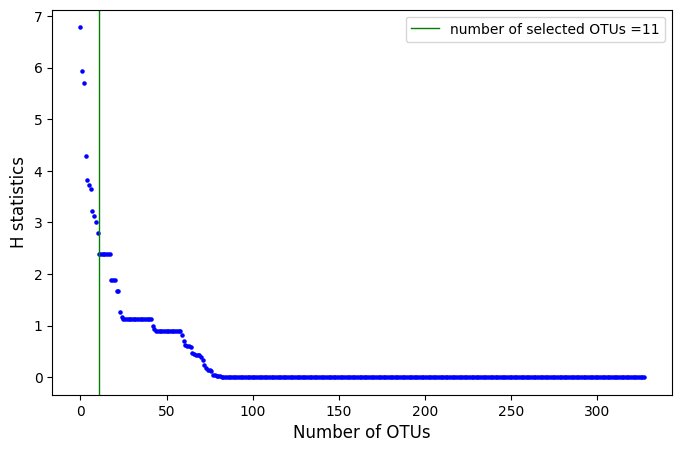

In [6]:
select_result = FS.SelectMicro_fun(df,y)

In [7]:
select_result.keys()
# abundance matrix--> relative abundance matrix (relative by sample, and delete that below 1%)


dict_keys(['selected_data', 'selected_columnames', 'selected_indices', 'relative_abundance_data', 'H_score'])

In [8]:
data=select_result['relative_abundance_data']


In [11]:
data_train, data_test, y_train, y_test = RunML_continue.split_and_scale_data(data,y)
AE_train, AE_test = RunML_continue.run_AE(data_train,data_test)

2025-01-16 11:42:32.448048: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


latent dimension: 100, activation:tanh, opt:adam,MAE:0.5693972706794739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [12]:
data_AE = pd.concat([AE_train, AE_test], axis=0).to_numpy()

In [13]:
df_AE = pd.DataFrame(data_AE)
df_AE['Y'] =y

### Model
Prepare 4 datasets: full dataset, our selected dataset, Lasso selected  dataset(based on the target variable), randomly selected data (selected the same numer of variables as in our method)

Use random forest and SVM as classifier, and will build both models for each response variable.

For Lasso, the dataset will be determined by the response variable, so the lasso subset is different for the models for different response variables.

For random selection, the  process will repeat iter=30 times to  find the mean accuracy and AUC

SMOTE  is used (the data is not balanced, as we can see the performance is really bad especially for SVM model when not using SMOTE)

In [ ]:
iter =30
cls = ["RF","SVM"]

In [ ]:
targetLabel=y
print(selectedOTU_index)

In [ ]:
X_lasso,xlabel_lasso = RunML_continue.LassoFeatureSelection(data,targetLabel)
print(xlabel_lasso)

In [ ]:
X_lasso_ft,xlabel_lasso_ft  = RunML_continue.LassoFS_CV(data,targetLabel)
print(xlabel_lasso_ft)

In [ ]:
data_subset = {"AllFeatures":data, 
               "SelectMicro": X_FS,
               "Lasso":X_lasso,
               "Lasso_finetune":X_lasso_ft,
               "Random":data
              }

In [ ]:
print(np.shape(data))
print(np.shape(X_FS))
print(np.shape(X_lasso))
print(np.shape(X_lasso_ft))

The  function will print out the accuracy and AUC for each dataset using each classifier, and also will return the y_actual, y_predict, y_predprob for future use.

In [ ]:
# compare the features selected by SelectMicro and Lasso
ASVs_selected_lasso = ASVs[xlabel_lasso]
# Convert arrays to sets for easier operations
set_FS = set(ASVs_selected)
set_Lasso = set(ASVs_selected_lasso)
# Items in both arrays (intersection)
intersection = set_FS & set_Lasso
# Items in array A but not in array B (difference)
only_in_a = set_FS - set_Lasso
# Items in array B but not in array A (difference)
only_in_b = set_Lasso - set_FS
# Print results
print("Items in both selection:", intersection)
print("Items in array FS but not in Lasso:", only_in_a)
print("Items in Lasso but not in FS:", only_in_b)

In [ ]:
FS.OTUviolin(X_FS,y,ASVs_selected)
FS.OTUviolin(X_lasso,y,ASVs_selected_lasso)

In [ ]:
ASVs_selected_lasso = ASVs[xlabel_lasso]
ASVs_selected_lasso_ft = ASVs[xlabel_lasso_ft]

df_lasso = pd.DataFrame(X_lasso, columns=ASVs_selected_lasso)
df_lasso2=df_lasso[list(only_in_b)]
df_lasso2['Y'] =y

print(df_lasso2.sort_values(by='Y'))


In [ ]:
X_lasso_FS1 = data[:,np.intersect1d(selectedOTU_index, xlabel_lasso)]
X_lasso_FS2 = data[:,np.intersect1d(selectedOTU_index, xlabel_lasso_ft)]
print(np.shape(X_lasso_FS1))
print(np.shape(X_lasso_FS2))
data_subset2 = {
               "intersection":X_lasso_FS1,
               "intersection_ft": X_lasso_FS2
              }

dict_cm2 = RunML_continue.runClassifier_FScompare(data_subsets= data_subset2,y= targetLabel,N=iter,classifiers=cls)
print(metric.metric_sum(dict_cm2))

X_FS_lasso,xlabel_FS_lasso = RunML_continue.LassoFeatureSelection(X_FS,targetLabel)
print(xlabel_FS_lasso)
X_FS_lasso_ft,xlabel_FS_lasso_ft  = RunML_continue.LassoFS_CV(X_FS,targetLabel)
print(xlabel_FS_lasso_ft)
data_subset3 = {
               "FS_Lasso":X_FS_lasso,
               "FS_Lassoft": X_FS_lasso_ft
              }
dict_cm3 = RunML_continue.runClassifier_FScompare(data_subsets= data_subset3,y= targetLabel,N=iter,classifiers=cls)
print(metric.metric_sum(dict_cm3))

In [ ]:
dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,N=iter,classifiers=cls,SMOTE=False)
print(metric.metric_sum(dict_cm))

In [ ]:
ASVs_selected_RF_lasso = ASVs_selected[xlabel_FS_lasso_ft]
FS.OTUviolin(X_FS_lasso_ft,y,ASVs_selected_RF_lasso)

In [ ]:
for dataset_name, classifiers in dict_cm.items():
        for classifier_name, labels in classifiers.items():
            actual_labels = labels[0]
            predicted_labels = labels[1]
            metric.plot_confusion_matrices(actual_labels, predicted_labels,f"{dataset_name} - {classifier_name}")

In [ ]:
#from itertools import product
from cliffs_delta import compute as cliffs_delta_compute
# Function to calculate Cliff's Delta for each feature
def cliffs_delta_per_feature(X, y):
    """
    Calculate Cliff's Delta for each feature.
    
    Parameters:
    X (ndarray): 2D array of shape (n_samples, n_features) representing feature data.
    y (ndarray): 1D array of shape (n_samples,) representing group labels (0 or 1).
    
    Returns:
    dict: A dictionary where keys are feature indices and values are the corresponding Cliff's Delta for each feature.
    """
    n_features = X.shape[1]
    delta_values = {}
    
    # Separate the data into two groups based on y
    group_0 = X[y == 0]  # Group 0
    group_1 = X[y == 1]  # Group 1
    
    # Calculate Cliff's Delta for each feature
    for feature_idx in range(n_features):
        feature_0 = group_0[:, feature_idx]  # Get feature column for group 0
        feature_1 = group_1[:, feature_idx]  # Get feature column for group 1
        
        # Calculate Cliff's Delta for the current feature
        delta = cliffs_delta_compute(feature_0, feature_1)
        delta_values[feature_idx] = delta
    
    return delta_values

### compare the first 15 index by their present ratio

In [ ]:
FS.plotPresenseRatio(X_FS,targetLabel,ASVs_selected,posLabel="Good",posText="Good",negText="Bad")

In [ ]:

FS.plotPresenseRatio(X_lasso,targetLabel,ASVs_selected_lasso,posLabel="Good",posText="Good",negText="Bad")

FS.plotPresenseRatio(X_lasso_ft,targetLabel,ASVs_selected_lasso_ft,posLabel="Good",posText="Good",negText="Bad")

In [ ]:
metric_results = []
for dataset_name, classifiers in dict_cm.items():
        for classifier_name, labels in classifiers.items():
            actual_labels = labels[0]
            predicted_labels = labels[1]
            print(metric_tb(actual_labels,predicted_labels))
            

In [ ]:
for dataset_name, classifiers in dict_cm.items():
        for classifier_name, labels in classifiers.items():
            actual_labels = labels[0]
            predicted_labels = labels[1]
            print(pd.DataFrame([metric_tb(actual_labels,predicted_labels)]))

In [ ]:
dict_cm2

In [ ]:
df_lasso=pd.DataFrame(X_lasso)
df_lasso.columns = ASVs_selected_lasso
df_lasso.index = y

# Sort DataFrame by index
df_sorted = df_lasso.sort_index()

#print("\nSorted DataFrame by index:")
#print(df_sorted)

In [ ]:
weights[xlabel_lasso]# check it's H

### Negative Gini Impurity
Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. It’s calculated as:

$G = 1- \sum_{i=1}^C p_i^2$

where C is the number of classes. (which means it can be used to measure for multiple level classification)

Here I will use the negative Gini Impurity to measure each OTU, if NG is large (1) which means the OTU only exist in one class, if NG value is small($1/c$) which means the OTU is evenly distributed among  the classes.

$NG = \sum_{i=1}^C p_i^2$

In [ ]:
# NG for selected OTU
NG_selected = metric.Neg_GINI(X_FS,y)
print(NG_selected.shape)
# NG for Not selected OTU
X_FS_none = np.delete(data, selectedOTU_index, axis=1)
NG_noselected = metric.Neg_GINI(X_FS_none,y)
print(NG_noselected.shape)

In [ ]:
X_lasso = data[:,xlabel_lasso]
print(X_lasso.shape)
X_lasso_none = np.delete(data, xlabel_lasso, axis=1)
print(X_lasso_none.shape)
Ng1 = metric.Neg_GINI(X_lasso,y)
Ng2 = metric.Neg_GINI(X_lasso_none,y)
ng_lasso=[Ng1,Ng2]


In [ ]:
NG_selected

In [ ]:
ng_lasso[0]

#### Compare lasso and SelectMicro

In [ ]:
plt.boxplot([NG_selected, ng_lasso[0]], tick_labels=['SelectMicro', 'Lasso'])
plt.title(f'NG results of the selected OTU vs. non-selected OTUs')
plt.ylabel('NG')
plt.grid(axis='y')
#print(len(NG_selected[i, :]))
# Adjust layout
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()  # Show all plots at once
# the median of Lasso is 1

In [ ]:
# compare the selected and non select by our method

plt.boxplot([NG_selected, NG_noselected], tick_labels=['SelectMicro', 'Not selected'])
plt.title(f'NG results of the selected OTU vs. non selected OTUs by our method')
plt.ylabel('NG')
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
# compare the selected and non select by lasso

plt.boxplot([ng_lasso[0], ng_lasso[1]], tick_labels=['Lasso', 'Not selected'])
plt.title(f'NG results of the selected OTU vs. non-selected OTUs by Lasso')
plt.ylabel('NG')
plt.grid(axis='y')
# Adjust layout
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()  # Show all plots at once

In [ ]:
# Import necessary libraries
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score



In [ ]:

# Assuming you already have your data (X: features, y: response)
X = X_FS  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.append(y_test)
    y_predict.append(y_pred)

In [ ]:
# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")


In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = SVC(kernel='linear', C=1.0, gamma='scale', probability=True)  # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.append(y_test)
    y_predict.append(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='linear', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.append(y_test)
    y_predict.append(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='linear', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='rbf', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso_ft  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='rbf', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='rbf', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='linear', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
# Assuming you already have your data (X: features, y: response)
X = X_lasso  # Features (numpy array or pandas DataFrame)
y = targetLabel  # Target variable (binary or multiclass labels)

# Initialize the SVM model (e.g., with an RBF kernel)
svm_model = svm.SVC(kernel='poly', probability=True, random_state=777) # probability=True for ROC AUC

# Set up Leave-One-Out Cross-Validation
loo = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# List to store results
accuracies = []
y_actual = []
y_predict = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X,y):
    # Split into training and test data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model
    svm_model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    accuracies.append(accuracy)
    y_actual.extend(y_test)
    y_predict.extend(y_pred)

# Calculate and print the mean accuracy and AUC
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Accuracy: {metric.accuracy(y_actual,y_predict)}")

In [ ]:
def fisher_discriminant_ratio(features, labels):
    """
    Calculate the Fisher's discriminant ratio (F1) for an entire dataset.

    Parameters:
    - features: A 2D numpy array of feature values (samples x features).
    - labels: A 1D numpy array of class labels corresponding to the samples.

    Returns:
    - F1: Fisher's discriminant ratio for the dataset.
    """
    # Ensure features and labels are numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    # Get unique classes
    classes = np.unique(labels)
    if len(classes) != 2:
        raise ValueError("This implementation only supports two classes.")

    # Calculate class-wise means and overall mean
    overall_mean = np.mean(features, axis=0)
    class_means = [np.mean(features[labels == c], axis=0) for c in classes]

    # Calculate between-class scatter
    between_class_scatter = sum(
        len(features[labels == c]) * np.outer((class_mean - overall_mean), (class_mean - overall_mean))
        for c, class_mean in zip(classes, class_means)
    )

    # Calculate within-class scatter
    within_class_scatter = sum(
        sum(np.outer((sample - class_mean), (sample - class_mean)) for sample in features[labels == c])
        for c, class_mean in zip(classes, class_means)
    )

    # Compute Fisher's discriminant ratio
    F1 = np.trace(between_class_scatter) / np.trace(within_class_scatter)

    return F1

In [ ]:
for datatype, subset in data_subset.items():
    print(f"f1 of {datatype} = {fisher_discriminant_ratio(subset,targetLabel)}")
    

### feature selection in each fold

In [ ]:
result_fulldata = []
for i, cl in enumerate(cls):
    result_fulldata.append(RunML_continue.cross_fold_validation(data,targetLabel,cl))
    print(f"for {cl}, mean_accuracy = {result_fulldata[i]['mean_accuracy']}, mean_auc = {result_fulldata[i]['mean_auc']}")
    tb_result = metric.metric_tb(result_fulldata[i]['y_true'], result_fulldata[i]['y_pred'])
    print(tb_result)
